## 尝试基于词向量，构建embedding


In [1]:
import pandas as pd
import numpy as np
import jieba as jb
import re

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import  pad_sequences
from tensorflow.keras .models import  Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import  Conv1D
from tensorflow.keras.layers import  MaxPooling1D

from tensorflow.keras.models import load_model
#.convolutional .convolutional

## 获取数据

In [271]:
csv='./7000data.csv'
file_txt=pd.read_csv(csv, header=0,encoding='utf-8')

file_txt=file_txt.dropna() # 删除空值

#添加文字标签
# file_txt['biaoqian']=''
# file_txt.loc[file_txt['Type_Code']==6,'biaoqian']='财经'
# file_txt.loc[file_txt['Type_Code']==5,'biaoqian']='科技'
# file_txt.loc[file_txt['Type_Code']==4,'biaoqian']='时政'
# file_txt.loc[file_txt['Type_Code']==3,'biaoqian']='时尚'
# file_txt.loc[file_txt['Type_Code']==2,'biaoqian']='教育'
# file_txt.loc[file_txt['Type_Code']==1,'biaoqian']='房产'
# file_txt.loc[file_txt['Type_Code']==0,'biaoqian']='家居'
print(file_txt)


     Type_Code                                            Content
0           家居  仿古地板流行更适合大住宅冬的木地板似乎也受到了“古风”熏染，通体上下透出一股浓浓的“复古味”...
1           家居  伊力诺依缔造传统 首度重推家居中国风11月初，由伊力诺依董事长史晓燕亲自操刀设计的伊力诺依东...
2           家居  伊奈卫浴庵原岳史：收购美标加大在中国的扩张 【记者】：在2009这么萎靡的市场环境下，伊奈为...
3           家居  休闲卫浴市场急剧萎缩 未来如何走休闲卫浴之风兴起自欧美，并曾在2005年前后繁盛一时。但自从...
4           家居  众商云集 秀出精彩近日，家博会组委会秋季展招展工作已基本结束，所设的1000多个展位已被北京...
...        ...                                                ...
6995        财经  近期18只偏股基金成立 将为股市新增300亿资金兴业有机增长混合基金23日发布公告称，基金募...
6996        财经  银华基金杨靖聊政策性主题投资机会实录新浪财经讯 银华和谐主题基金拟任基金经理助理杨靖于3月2...
6997        财经  首只基金投资信心指数问世本报讯 (记者吴敏)昨日，嘉实基金宣布推出“嘉实中国基金投资者信心指...
6998        财经  17只阳光私募3月份火速成立证券时报记者 方 丽本报讯 阳光私募产品迎来了发行高潮。WIND...
6999        财经  25日股票基金全线受挫 九成半基金跌逾1%全景网3月26日讯 周三开放式基金净值普降，股票型...

[7000 rows x 2 columns]


In [173]:
testcsv = "./420smalltest.csv"
test_file_text = pd.read_csv(testcsv, header = 0, encoding = "utf-8")

print(test_file_text)


     Type_Code                                            Content
0            0  仿古地板流行更适合大住宅冬的木地板似乎也受到了“古风”熏染，通体上下透出一股浓浓的“复古味”...
1            0  伊力诺依缔造传统 首度重推家居中国风11月初，由伊力诺依董事长史晓燕亲自操刀设计的伊力诺依东...
2            0  伊奈卫浴庵原岳史：收购美标加大在中国的扩张 【记者】：在2009这么萎靡的市场环境下，伊奈为...
3            0  休闲卫浴市场急剧萎缩 未来如何走休闲卫浴之风兴起自欧美，并曾在2005年前后繁盛一时。但自从...
4            0  众商云集 秀出精彩近日，家博会组委会秋季展招展工作已基本结束，所设的1000多个展位已被北京...
..         ...                                                ...
415          6  沪基指半日跌0.69% 跑输大盘量能萎缩两成全景网2月10日讯 沪深基金指数周二早盘小幅收低...
416          6  百只股票基金火线加仓 百只股票基金火线加仓渤海证券监测数据，截至春节前最后一天，123只股票...
417          6  私募基金一月跑赢公募 最大涨幅为18.67%本报讯 (记者 敖晓波) 继去年熊市中私募战胜公...
418          6  纽约梅隆银行欲携手西部证券组建基金管理公司□本报记者 韩洁 白洁纯 正在北京访问的纽约梅隆银...
419          6  1月CPI数据公布 基金认为降息空间或将有限□晨报记者 李锐昨日，国家统计局发布的数据显示，...

[420 rows x 2 columns]


## 预处理

In [272]:
# 定义删除除字母,数字，汉字以外的所有符号的函数
def remove_punctuation(line):
    line = str(line)
    if line.strip() == '':
        return ''
    rule = re.compile('[^\u4e00-\u9fa5]')
    line = rule.sub('', line)
    return line

#停用词
def stopwordslist(filepath):
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]
    return stopwords

# 加载停用词
stopwords = stopwordslist("stop.txt")

## 获取训练集 词典

In [273]:
import jieba.analyse
import jieba.posseg
#去除标点符号
# file_txt['c']=file_txt['Content'].apply(remove_punctuation)
#去除停用词
file_txt['new']=file_txt['Content'].apply(lambda x:" ".join([w for w in list(jb.analyse.textrank(x, topK = None, withWeight= False, allowPOS=("ns", "n", "vn", "v")))]))
# allowPOS = ('ns','n','vn','v')
file_txt['new'].sample(10)

1111    苏州 地块 经济 开发区 观点 商业 新港 子公司 省道 使用权 复线 位于 地皮 下属 建...
1757    政策 标准 投机 需求 人士 住房 套房 房价 银行 利率 认定 统一 购房 遏制 投资 划...
65      实木 家具 木家具 锯材 板材 采用 制成 制作 基材 部分 刨花板 贴面 不能 通用 称为...
1745    信贷 货币政策 表示 银行 可能 贷款 流动性 监管 反弹 防止 保持 上升 资产 项目 加...
2375    留学 费用 下降 总体 人民币 美国 英国 使得 升值 计算 资深 收费 出现 节省 贬值 ...
13      集团 媒体 企业 辽阳 记者 进入 辽宁 上市 专门 员工 工作 董事 香港 看到 汇源 有...
6120    基金 股票 证券 参与 投资 增发 认购 工银 晋西 车轴 旗下 公告 价值 成长 购买 全...
833     全友 家私 全国 品牌 走进 中国 消费者 意大利 产品 德国 销量 一流 时刻 来自 文化...
4804    中国 力拓 澳大利亚 外国 企业 有关 公司 部门 办事处 投资 不了 欢迎 外资企业 利益...
4659    中国 研究会 团体 社会 学会 检查 文化 管理 警告 协会 年度 停止 活动 行政处罚 程...
Name: new, dtype: object

In [194]:
import jieba.analyse
import jieba.posseg
#去除标点符号
# file_txt['clean_review']=file_txt['Content'].apply(remove_punctuation)
#去除停用词
test_file_text['new']=test_file_text['Content'].apply(lambda x:" ".join([w for w in list(jb.analyse.textrank(x, topK = None, withWeight= False, allowPOS=("ns", "n", "vn", "v")))]))
# , allowPOS = ('ns','n','vn','v')
test_file_text['new'].sample(10)

6      地板 价格 消费者 木地板 展厅 销售 记者 人员 告诉 品牌 品种 装修 产品 特价 市场...
195    品牌 价值 搭配 场景 女主角 影片 铆钉 欲望都市 衬衫 电影 部分 造型 年龄 礼服 造...
325    消费者 防抖 优势 性能 使得 配置 表现出色 拥有 性价比 机身 更具 颜色 介入 需求 ...
351    时间 产品 音乐 采用 芯片 蓝魔 接近 新品 外观设计 小时 表现 输出 耳机 提供 版本...
193    中国 拍摄 公司 国际 名模 法国 时装周 没有 上海 安排 封面 面试 时尚 涌入 风格 ...
51     家具 装修 风格 业主 设计师 家装 家居 搭配 设计 颜色 饰品 统一 要素 房间 公司 ...
360    基金 型基金 市场 股票 投资 公司 债券 可能 机会 统计 创下 募集 超过 涨幅 价值 ...
173    美国 学生 中国 学校 私立高中 申请 中学 招生 教育 留学 能够 吸引 活动 背景 比例...
59     有限公司 地板 全国 集团 木业 答题 经销商 大赛 圣象 店员 工业协会 专业 品牌 卖场...
202     内衣 流苏 人们 创意 示范 放在 想放 导语 装饰物 置入 时尚 尝试 经典 位置 组图 作品
Name: new, dtype: object

## all_text 包含所有

In [274]:
all_words = [file_txt['new'], test_file_text['new']]
all_text = pd.concat(all_words, keys = ['train','val'])

In [275]:
print(all_text)

train  0      地板 木地板 风格 个性 成本 消费 可能 装修 理解 流行 手工制造 家居 行家 住宅 刻...
       1      中国 生活 元素 方式 传统 加入 时尚 产品 现代感 家具 国际 情节 使用 流行 寻求 ...
       2      中国 市场 记者 美标 行业 收购 方面 关注 没有 推广 希望 渠道 住宅 环境 网站 进...
       3      休闲 产品 市场 消费者 功能 企业 洗浴 问题 浴缸 专业 淋浴房 厂家 传统 按摩 萎缩...
       4      家居 博会 展会 装饰 北京 企业 中国 经济 建材行业 消费者 现场 参展 建材 陶瓷 成...
                                    ...                        
val    415    基金 上涨 下跌 交易 方面 萎缩 开盘 收盘 大盘 小幅 封闭式 逊于 午盘 表现 收低 ...
       416    基金 仓位 股票 加仓 型基金 刺激 行情 预期 数据 转变 经济 公司 火线 先行 小盘 ...
       417    基金 产品 证券 统计 收益 超过 投资 净值 获得 宏观经济 上涨 预期 支撑 显示 研究...
       418    管理 银行 纽约 公司 中国 基金 成立 合资 市场 资产 分行 证券 清算 亚太地区 经验...
       419    经济 数据 市场 预期 降息 回暖 出现 没有 过程 苗头 基金 显示 阶段 月份 居民消费...
Name: new, Length: 7420, dtype: object


In [276]:
print(all_text["val"])

0      地板 木地板 风格 个性 成本 消费 可能 装修 理解 流行 手工制造 家居 行家 住宅 刻...
1      中国 生活 元素 方式 传统 加入 时尚 产品 现代感 家具 国际 情节 使用 流行 寻求 ...
2      中国 市场 记者 美标 行业 收购 方面 关注 没有 推广 希望 渠道 住宅 环境 网站 进...
3      休闲 产品 市场 消费者 功能 企业 洗浴 问题 浴缸 专业 淋浴房 厂家 传统 按摩 萎缩...
4      家居 博会 展会 装饰 北京 企业 中国 经济 建材行业 消费者 现场 参展 建材 陶瓷 成...
                             ...                        
415    基金 上涨 下跌 交易 方面 萎缩 开盘 收盘 大盘 小幅 封闭式 逊于 午盘 表现 收低 ...
416    基金 仓位 股票 加仓 型基金 刺激 行情 预期 数据 转变 经济 公司 火线 先行 小盘 ...
417    基金 产品 证券 统计 收益 超过 投资 净值 获得 宏观经济 上涨 预期 支撑 显示 研究...
418    管理 银行 纽约 公司 中国 基金 成立 合资 市场 资产 分行 证券 清算 亚太地区 经验...
419    经济 数据 市场 预期 降息 回暖 出现 没有 过程 苗头 基金 显示 阶段 月份 居民消费...
Name: new, Length: 420, dtype: object


## tokenizer 构建，输入是语料

In [277]:
def create_tokenizer(lines):
    tokenizer=Tokenizer()
    tokenizer.fit_on_texts(lines)
    return  tokenizer

all_tokenizer = create_tokenizer(all_text)
# print(file_txt['cut_review'])

## 单条数据的最大长度

In [278]:
# max_length=max([len(s.split()) for s in all_text])

ml = 0
for s in all_text:
    tmp = []
    tmp = s.split()
    if len(tmp) > ml:
        ml = len(tmp)
max_length = ml
print('最长词语 句子：',max_length) # 907

# print('最长词语 句子：',max_length) # 3361

最长词语 句子： 907


In [279]:
a_t = [file_txt, test_file_text]
all_t = pd.concat(a_t,keys = ['train','val'] )

In [280]:
print(all_t["new"])
#["train"]

train  0      地板 木地板 风格 个性 成本 消费 可能 装修 理解 流行 手工制造 家居 行家 住宅 刻...
       1      中国 生活 元素 方式 传统 加入 时尚 产品 现代感 家具 国际 情节 使用 流行 寻求 ...
       2      中国 市场 记者 美标 行业 收购 方面 关注 没有 推广 希望 渠道 住宅 环境 网站 进...
       3      休闲 产品 市场 消费者 功能 企业 洗浴 问题 浴缸 专业 淋浴房 厂家 传统 按摩 萎缩...
       4      家居 博会 展会 装饰 北京 企业 中国 经济 建材行业 消费者 现场 参展 建材 陶瓷 成...
                                    ...                        
val    415    基金 上涨 下跌 交易 方面 萎缩 开盘 收盘 大盘 小幅 封闭式 逊于 午盘 表现 收低 ...
       416    基金 仓位 股票 加仓 型基金 刺激 行情 预期 数据 转变 经济 公司 火线 先行 小盘 ...
       417    基金 产品 证券 统计 收益 超过 投资 净值 获得 宏观经济 上涨 预期 支撑 显示 研究...
       418    管理 银行 纽约 公司 中国 基金 成立 合资 市场 资产 分行 证券 清算 亚太地区 经验...
       419    经济 数据 市场 预期 降息 回暖 出现 没有 过程 苗头 基金 显示 阶段 月份 居民消费...
Name: new, Length: 7420, dtype: object


## 构建所有文本数据的语料

In [281]:
tcorpus = all_t["new"]## create list of lists of unigrams

tr_corpus = []
for string in tcorpus:
    tr_words = string.split()
    tr_grams = [" ".join(tr_words[i:i+1]) for i in range(0, len(tr_words), 1)]
    tr_corpus.append(tr_grams) ## detect bigrams and trigrams

In [282]:
print(len(tcorpus))
print(len(tr_corpus[0]))
total_w = 0
max = 0
index = 0
for i in tr_corpus:
    if len(i) > max:
        max = len(i)
        index = tr_corpus.index(i)
print(max)
print(index)
print(tr_corpus[index])

7420
80
907
2557
['移民', '中国', '社会', '记者', '公司', '温州', '投资', '加拿大', '生活', '问题', '孩子', '没有', '美国', '发展', '身份', '开始', '企业家', '财富', '北京', '成为', '还有', '拿到', '签证', '原因', '资产', '生意', '朋友', '转移', '人们', '加币', '财产', '绿卡', '影响', '周刊', '个人', '世界', '话题', '技术', '国籍', '教育', '报告', '起来', '经济', '专门', '需要', '流失', '政策', '国家', '阶层', '中年人', '会长', '房子', '有钱人', '侨领', '全家', '精英', '邻居', '人士', '资金', '办理', '面对', '选择', '秘鲁', '人民币', '继续', '参加', '是否', '户口', '全球', '数量', '华人', '儿子', '环境', '坐在', '过程', '企业', '可能', '中心', '迪拜', '关注', '股东', '净值', '个体', '显示', '变化', '劳动', '高层', '通知', '申请', '同学', '起码', '啤酒', '原始', '白色', '应该', '回来', '接待', '考虑', '经历', '消费', '带走', '中坚', '认为', '不行', '买房', '盒饭', '想象', '东西', '创业', '客人', '床垫', '体检', '新闻', '电话', '觉得', '躲避', '香港', '方式', '故事', '宴会', '商人', '农村', '归拢', '调查', '组织', '压力', '设立', '上学', '土地', '不用', '不会', '意味着', '行为', '资料', '指数', '分管', '受限', '凭证', '魁北克省', '时间', '发生', '借出去', '目的', '构成', '无法', '私人', '保护', '人才', '研究所', '超过', '群体', '接受', '不确定性', '表示', '行业', '行李箱', '合法', '集体', '西裤', '身穿', '能力', '放在

# 前面的准备目的都是：基于所有语料，训练词向量

In [283]:
## fit 
from gensim.models import word2vec
w2vnlp = word2vec.Word2Vec(tr_corpus, vector_size=200,  window=8, min_count=1, sg=1, epochs=30)

In [284]:
w2vnlp.save("./t3_model.model")

In [285]:
w2vnlp = word2vec.Word2Vec.load("./t3_model.model")

In [286]:
print(w2vnlp.wv["市场"].shape)

(200,)


## 降维可视化

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


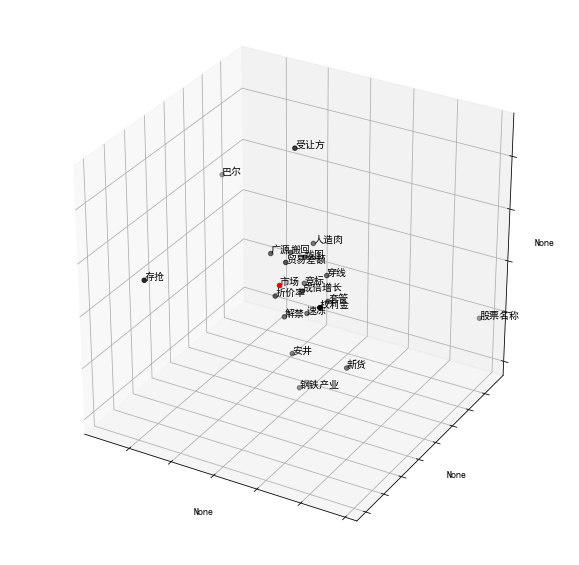

In [208]:
import matplotlib.pyplot as plt
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing## for explainer
from lime import lime_text ## for word embedding
word = "市场"
fig = plt.figure(figsize=(10,10))## word embedding
tot_words = [word] + [tupla[0] for tupla in w2vnlp.wv.most_similar(word, topn=20)]
X = w2vnlp.wv[tot_words]## pca to reduce dimensionality from 300 to 3
pca = manifold.TSNE(perplexity=40, n_components=3, init='pca')
X = pca.fit_transform(X)## create dtf
dtf_ = pd.DataFrame(X, index=tot_words, columns=["x","y","z"])
dtf_["input"] = 0
dtf_["input"].iloc[0:1] = 1## plot 3d
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dtf_[dtf_["input"]==0]['x'], 
           dtf_[dtf_["input"]==0]['y'], 
           dtf_[dtf_["input"]==0]['z'], c="black")
ax.scatter(dtf_[dtf_["input"]==1]['x'], 
           dtf_[dtf_["input"]==1]['y'], 
           dtf_[dtf_["input"]==1]['z'], c="red")
ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], 
       yticklabels=[], zticklabels=[])
for label, row in dtf_[["x","y","z"]].iterrows():
    x, y, z = row
    ax.text(x, y, z, s=label)

In [287]:
print(all_tokenizer)

## 构建所有语料的text2seq

In [288]:
import gensim.downloader as gensim_api## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K## for bert language model
import transformers
all_dic_vocabulary = all_tokenizer.word_index## create sequence
all_text2seq= all_tokenizer.texts_to_sequences(tr_corpus)## padding sequence


In [289]:
print(all_text2seq)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [290]:
def create_tokenizer(lines):
    tokenizer=Tokenizer()
    tokenizer.fit_on_texts(lines)
    return  tokenizer

# all_tokenizer = create_tokenizer(all_text)

In [291]:
print(file_txt["new"])
print(all_text)

0       地板 木地板 风格 个性 成本 消费 可能 装修 理解 流行 手工制造 家居 行家 住宅 刻...
1       中国 生活 元素 方式 传统 加入 时尚 产品 现代感 家具 国际 情节 使用 流行 寻求 ...
2       中国 市场 记者 美标 行业 收购 方面 关注 没有 推广 希望 渠道 住宅 环境 网站 进...
3       休闲 产品 市场 消费者 功能 企业 洗浴 问题 浴缸 专业 淋浴房 厂家 传统 按摩 萎缩...
4       家居 博会 展会 装饰 北京 企业 中国 经济 建材行业 消费者 现场 参展 建材 陶瓷 成...
                              ...                        
6995    基金 募集 成立 资金 发行 指数 股市 证券 行业 规模 达到 大盘 成长 投资者 兴业 ...
6996    政策 投资 可能 政府 机会 主持人 经济 能够 市场 基金 包括 行业 应该 出来 主题 ...
6997    信心 投资者 指数 投资 基金 感受 主观 状态 反映 进行 资产 心理 指标 预期 综合 ...
6998    成立 产品 信托 月份 发行 投资 市场 基金 显示 部分 认购 管理 业绩 仓位 国际 人...
6999    基金 型基金 跌幅 股票 收益 超过 全线 受挫 优选 治理 公司 配置 指数 方面 国债 ...
Name: new, Length: 7000, dtype: object
train  0      地板 木地板 风格 个性 成本 消费 可能 装修 理解 流行 手工制造 家居 行家 住宅 刻...
       1      中国 生活 元素 方式 传统 加入 时尚 产品 现代感 家具 国际 情节 使用 流行 寻求 ...
       2      中国 市场 记者 美标 行业 收购 方面 关注 没有 推广 希望 渠道 住宅 环境 网站 进...
       3      休闲 产品 市场 消费者 功能 企业 洗浴 问题 浴缸 专业 淋浴房 厂家 传统 按摩 萎缩...
       4      家居 博会 展会 装饰 北京 企业 中国 经济 建材行业 消费者 现场 参展 建材 陶瓷 成...
   

## 准备测试集、训练集，各自的tokenizer、text2seq

In [292]:
train_tokenizer = create_tokenizer(file_txt['new'])
train_dic_vocabulary = train_tokenizer.word_index## create sequence
train_text2seq= train_tokenizer.texts_to_sequences(file_txt['new'])## padding sequence
print(train_tokenizer)

In [293]:
print(test_file_text['new'])

0      地板 木地板 风格 个性 成本 消费 可能 装修 理解 流行 手工制造 家居 行家 住宅 刻...
1      中国 生活 元素 方式 传统 加入 时尚 产品 现代感 家具 国际 情节 使用 流行 寻求 ...
2      中国 市场 记者 美标 行业 收购 方面 关注 没有 推广 希望 渠道 住宅 环境 网站 进...
3      休闲 产品 市场 消费者 功能 企业 洗浴 问题 浴缸 专业 淋浴房 厂家 传统 按摩 萎缩...
4      家居 博会 展会 装饰 北京 企业 中国 经济 建材行业 消费者 现场 参展 建材 陶瓷 成...
                             ...                        
415    基金 上涨 下跌 交易 方面 萎缩 开盘 收盘 大盘 小幅 封闭式 逊于 午盘 表现 收低 ...
416    基金 仓位 股票 加仓 型基金 刺激 行情 预期 数据 转变 经济 公司 火线 先行 小盘 ...
417    基金 产品 证券 统计 收益 超过 投资 净值 获得 宏观经济 上涨 预期 支撑 显示 研究...
418    管理 银行 纽约 公司 中国 基金 成立 合资 市场 资产 分行 证券 清算 亚太地区 经验...
419    经济 数据 市场 预期 降息 回暖 出现 没有 过程 苗头 基金 显示 阶段 月份 居民消费...
Name: new, Length: 420, dtype: object


In [294]:
print(train_text2seq)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [295]:
test_tokenizer = create_tokenizer(test_file_text['new'])
test_dic_vocabulary = test_tokenizer.word_index## create sequence
test_text2seq= test_tokenizer.texts_to_sequences(test_file_text['new'])## padding sequence
print(test_text2seq)

[[920, 1881, 135, 400, 328, 466, 16, 401, 523, 207, 5080, 329, 5081, 232, 2405, 3278, 2, 671, 258, 5082, 52, 5083, 172, 306, 4, 921, 5084, 804, 115, 2406, 2407, 259, 5085, 5086, 566, 1567, 805, 3279, 1336, 152, 173, 1337, 9, 5087, 136, 5088, 467, 672, 1882, 5089, 2408, 435, 1151, 3280, 468, 58, 307, 806, 5090, 1883, 2409, 295, 162, 673, 807, 3281, 1152, 1568, 120, 7, 296, 23, 1569, 402, 5091, 469, 5092, 353, 233, 3282], [1, 43, 922, 73, 163, 403, 58, 28, 5093, 494, 29, 3283, 53, 207, 1570, 125, 276, 567, 247, 5094, 25, 329, 5095, 2410, 3284, 152, 808, 5096, 5097, 3285, 674, 2411, 1040, 5098, 5099, 3286, 1338, 5100, 568, 2412, 2413, 5101, 1884, 3287, 142, 2414, 194, 3288, 3289, 5102, 5103, 5104, 5105, 724, 809, 137, 308, 5106, 923, 5107, 31, 1339, 2415, 725, 1885, 330, 297, 5108, 63, 5109, 5110, 5111, 2416, 524, 5112, 404, 1886, 317, 354, 5113, 3290, 5114, 2417, 924, 3291, 3292, 70, 5115, 5116, 467, 3293, 164, 470, 126, 3294, 495, 5117, 61, 2, 1883, 5118, 2418, 1153, 127, 208, 2419, 57,

## 工程化

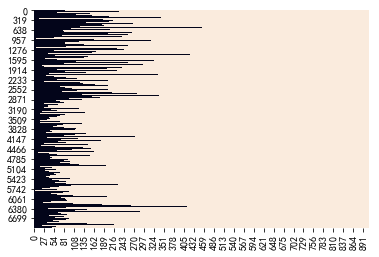

In [296]:
import seaborn as sns
X_t = kprocessing.sequence.pad_sequences(train_text2seq, maxlen=907, padding="post", truncating="post")
sns.heatmap(X_t==0, vmin=0, vmax=1, cbar=False)
plt.show()

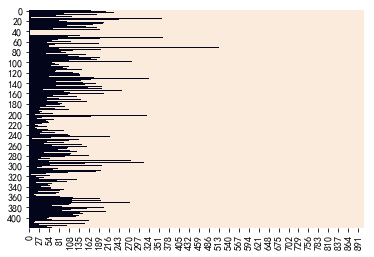

In [297]:
import seaborn as sns
X_te = kprocessing.sequence.pad_sequences(test_text2seq, maxlen=907, padding="post", truncating="post")
sns.heatmap(X_te==0, vmin=0, vmax=1, cbar=False)
plt.show()

In [298]:
print(len(X_te))

420


In [299]:
print(len(train_dic_vocabulary))
print(len(test_dic_vocabulary))
print(len(all_dic_vocabulary))

49925
11889
49925


## 嵌入词向量，embeddings

In [300]:
w2vnlp = word2vec.Word2Vec.load("./t3_model.model")

In [301]:
embeddings = np.zeros((len(all_dic_vocabulary)+1, 200))  # 31775 * 200 词嵌入矩阵
for word,idx in all_dic_vocabulary.items():
    ## update the row with vector    
    try:
        embeddings[idx] =  w2vnlp.wv[word]
    ## if word not in model then skip and the row stays all 0s    
    except:
        print(word, "faile")
        pass

a股 faile
t恤 faile
t台 faile
x光 faile
a座 faile
h股 faile
u盘 faile
b型 faile
t恤衫 faile
b座 faile
a型 faile
c座 faile
b股 faile
ip卡 faile
d座 faile
aa制 faile
b超 faile
f座 faile
cd机 faile
d版 faile
d盘 faile
e通 faile
e座 faile
ph值 faile
n年 faile
4s店 faile
阿q faile
c语言 faile
qq号 faile


In [302]:

word = "香港股市"
print("dic[word]:", all_dic_vocabulary[word], "|idx")
print("embeddings[idx]:", embeddings[all_dic_vocabulary[word]].shape, "|vector")

dic[word]: 19973 |idx
embeddings[idx]: (200,) |vector


## 准备训练集

In [322]:
from tensorflow import keras
X_train=pad_sequences(train_text2seq, maxlen = 50, padding = "post")
y_train=all_t["Type_Code"]["train"]

In [323]:
print(y_train,X_train)

0       家居
1       家居
2       家居
3       家居
4       家居
        ..
6995    财经
6996    财经
6997    财经
6998    财经
6999    财经
Name: Type_Code, Length: 7000, dtype: object [[ 8517   251 28565 ...   439   188 13088]
 [ 3500  1840 21379 ...  1619   473   823]
 [  101  9116  1059 ...   218  2359   673]
 ...
 [  470   139   254 ...     0     0     0]
 [  400   529   139 ...   323    42 13123]
 [   41   294   929 ...  4194  3755   212]]


## 准备训练集的标签

In [324]:
yd_names1 = {'家居':0,'房产':1,'教育':2,'时尚':3,'时政':4,'科技':5,'财经':6}
a = []
for y in y_train:
#     print(y)
    a.append(yd_names1[y])
# print(a)
# print(a)
y_train=np.array(a)
# y_train = np.array(y_train)
Y_train=keras.utils.to_categorical(y_train,7) # 7分类

In [325]:
print(y_train)

[0 0 0 ... 6 6 6]


## 定义模型

## max_length 可以修改来表示特征向量的维度

In [334]:
def define_mo():
    max_length = 50
    voca_size = 49925
    x_in = layers.Input(shape=(max_length,))## embedding
    x = layers.Embedding(input_dim=embeddings.shape[0],  output_dim=embeddings.shape[1], weights=[embeddings],input_length=max_length, trainable=False)(x_in)
    x = layers.Bidirectional(layers.LSTM(units=max_length, dropout=0.2, return_sequences=True))(x)
    x = layers.Bidirectional(layers.LSTM(units=max_length, dropout=0.2))(x)## final dense layers
    x = layers.Dense(16, activation='relu')(x)  # 
    y_out = layers.Dense(7, activation='softmax')(x)## compile 七分类
    model = models.Model(x_in, y_out)


    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

## 训练模型

In [335]:
def train_mo():
    model = define_mo()
    model.fit(X_train, y_train, shuffle=True,epochs=10, batch_size = 1, verbose=2,validation_split=0.3)
    model.save('词向量模型分类-7000data.h5')
train_mo()

Model: "model_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        [(None, 50)]              0         
_________________________________________________________________
embedding_32 (Embedding)     (None, 50, 200)           9985200   
_________________________________________________________________
bidirectional_27 (Bidirectio (None, 50, 100)           100400    
_________________________________________________________________
bidirectional_28 (Bidirectio (None, 100)               60400     
_________________________________________________________________
dense_54 (Dense)             (None, 16)                1616      
_________________________________________________________________
dense_55 (Dense)             (None, 7)                 119       
Total params: 10,147,735
Trainable params: 162,535
Non-trainable params: 9,985,200
_________________________________________

In [243]:
from tensorflow import keras
X_test=pad_sequences(test_text2seq, maxlen = 100, padding = "post")
y_test=all_t["Type_Code"]["val"]

In [244]:
# yd_names1 = {'家居':0,'房产':1,'教育':2,'时尚':3,'时政':4,'科技':5,'财经':6}
# a = []
# for y in y_train:
#     a.append(yd_names1[y])
# # print(a)
# print(len(a))
y_test=np.array(y_test)
Y_test=keras.utils.to_categorical(y_test,7) # 7分类

In [245]:
print(y_test, X_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6] [[ 920 1881  135 ...    0    0    0]
 [5109 5110 5111 ... 1573  811  812]
 [1343   87   31 ...  280 2438  820]
 ...
 [  40   28  316 ...    0    0 

In [250]:
mod = keras.models.load_model("词向量模型分类-7000data.h5")
y_pred = mod.predict(X_test)  #  模型当中由softmax ，最终预测得到的值，为每个类别的概率值，而不是类别
y_pred_cat = np.argmax(y_pred, axis = 1) # 转换为类别

In [251]:
print(y_pred_cat)

[5 4 4 3 6 5 4 1 0 4 4 3 4 5 3 5 2 2 4 5 0 4 5 4 3 5 5 3 5 4 0 1 4 2 0 5 5
 6 5 3 3 3 3 3 3 3 3 3 3 0 5 4 3 5 2 5 3 4 4 1 6 4 4 5 4 3 4 3 3 3 2 5 5 3
 3 3 2 5 5 2 2 2 5 5 5 5 4 4 3 4 5 4 5 4 1 3 6 3 4 4 3 6 2 5 0 3 5 5 6 5 1
 0 5 5 4 1 5 2 5 3 5 1 5 4 3 4 6 4 5 4 4 6 4 2 4 6 5 4 4 5 5 5 3 5 4 4 5 4
 6 5 6 3 6 5 3 2 1 1 3 5 6 6 5 1 2 4 5 5 3 5 3 3 4 2 2 5 3 5 4 2 4 5 1 4 5
 1 5 4 5 4 2 3 4 5 3 4 5 2 5 3 4 5 3 0 2 4 3 3 3 5 5 3 3 5 5 5 4 0 4 3 3 3
 5 3 3 5 5 3 3 5 3 5 3 4 3 5 4 5 6 3 3 2 1 5 4 6 5 3 3 3 0 5 6 2 5 5 3 4 5
 4 4 6 4 2 5 2 3 6 5 5 6 6 3 6 5 3 4 3 4 4 0 2 5 3 3 6 5 5 3 6 4 5 5 3 3 3
 4 3 5 3 2 5 6 6 3 5 5 2 5 1 2 1 1 1 5 5 5 5 3 6 3 6 5 3 2 3 5 0 1 5 1 3 3
 3 5 5 4 5 5 5 3 3 3 1 5 1 5 4 1 2 3 1 1 5 1 3 3 5 3 3 4 5 4 4 4 2 5 5 1 6
 5 3 4 4 3 2 5 5 5 4 3 2 2 4 3 4 3 2 3 4 4 2 5 3 5 6 5 2 4 4 5 3 5 4 5 3 3
 6 6 5 3 2 4 5 6 6 6 5 5 5]


In [146]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_cat))

ValueError: Classification metrics can't handle a mix of unknown and multiclass targets

In [249]:
yv = list(y_test)
resu = list(y_pred_cat)
tmp = -1
val_dic = {}
err = {}
total = 0
for i in range(400):
    if yv[i] == resu[i]:
        val_dic[yv[i]] = val_dic.get(yv[i], 0) + 1
        total += 1
    else:
        err[yv[i]] = err.get(yv[i], 0) + 1

print(val_dic)
print(err)
print(total / 1400)

{0: 5, 1: 3, 2: 6, 3: 20, 4: 10, 5: 20, 6: 2}
{0: 55, 1: 57, 2: 54, 3: 40, 4: 50, 5: 40, 6: 38}
0.047142857142857146


In [147]:
print(resu)

[2, 6, 6, 4, 6, 2, 5, 6, 4, 4, 6, 1, 1, 3, 1, 4, 4, 4, 6, 4, 4, 5, 4, 6, 6, 0, 2, 0, 6, 4, 1, 6, 0, 1, 0, 6, 1, 2, 3, 2, 6, 6, 1, 4, 4, 0, 2, 2, 1, 2, 1, 2, 1, 1, 1, 4, 6, 4, 4, 4, 0, 1, 0, 2, 3, 1, 4, 4, 1, 3, 5, 4, 6, 5, 5, 3, 1, 1, 4, 2, 2, 1, 3, 0, 5, 5, 1, 6, 5, 4, 0, 0, 6, 1, 1, 2, 1, 0, 1, 0, 5, 3, 4, 5, 0, 4, 5, 0, 3, 0, 4, 4, 2, 6, 6, 6, 0, 1, 1, 5, 2, 6, 2, 0, 2, 2, 6, 6, 6, 4, 1, 1, 6, 1, 6, 1, 4, 6, 0, 0, 1, 4, 6, 1, 4, 6, 2, 5, 1, 6, 1, 1, 2, 1, 6, 6, 1, 1, 1, 5, 1, 6, 6, 5, 6, 5, 4, 4, 1, 0, 4, 6, 1, 3, 5, 2, 6, 1, 0, 2, 6, 4, 2, 4, 2, 3, 0, 3, 4, 5, 1, 1, 0, 6, 4, 6, 3, 4, 0, 4, 2, 4, 0, 0, 4, 0, 5, 6, 2, 1, 4, 1, 2, 3, 1, 0, 1, 0, 1, 2, 4, 4, 0, 6, 0, 3, 5, 4, 5, 4, 0, 4, 4, 2, 1, 5, 1, 1, 4, 1, 1, 1, 5, 4, 6, 1, 4, 0, 0, 2, 4, 1, 5, 4, 2, 0, 0, 1, 1, 5, 1, 1, 0, 1, 6, 0, 1, 0, 0, 2, 4, 4, 3, 1, 6, 2, 1, 6, 4, 0, 4, 1, 0, 4, 5, 5, 3, 5, 1, 4, 6, 3, 5, 1, 0, 2, 3, 5, 0, 0, 3, 3, 4, 0, 5, 2, 4, 0, 1, 0, 1, 3, 2, 5, 4, 1, 3, 1, 1, 1, 5, 0, 4, 0, 6, 3, 0, 3, 5, 5, 4, 1, 6, 

In [24]:
def encode_docs(tokenizer,max_length,docs):
    encoded=tokenizer.texts_to_sequences(docs) # 单词-整数映射
    padded=pad_sequences(encoded,maxlen=max_length,padding='post')
    return padded

In [33]:
from tensorflow import keras
X_train=encode_docs(all_tokenizer,max_length,all_t["new"]["train"])
y_train=all_t["Type_Code"]["train"]

In [35]:
yd_names1 = {'家居':'0','房产':'1','教育':'2','时尚':'3','时政':'4','科技':'5','财经':'6'}
a = []
for y in y_train:
    a.append(yd_names1[y])
# print(a)
print(len(a))

7000


In [36]:
y_train=np.array(a)

In [37]:
print(y_train)

['0' '0' '0' ... '6' '6' '6']


In [38]:
Y_train=keras.utils.to_categorical(y_train,7) # 7分类

In [39]:
print(X_train, Y_train)

[[ 171  492   86 ...  292  131 5298]
 [   2   42  383 ...  256  133 9533]
 [   2    1   12 ...  597   45  107]
 ...
 [ 936   60  112 ...    2 1361  319]
 [ 340    5 1249 ...  358   10  915]
 [   3   94  546 ...  101  470  626]] [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [41]:
#定义神经网络模型
"""
#使用Embedding层作为第一层，需要指定词汇表大小，
实值向量空间的额大小以及输入文档的最大长度。词汇表大小是我们词汇表中的单词总数，加上一个未知单词
"""
vocad_size=len(all_tokenizer.word_index)+1
print('词汇表大小：',vocad_size) # 


词汇表大小： 18994


In [42]:

#定义神经网络模型
def define_model(vocad_size,max_length):
    model=Sequential()
    model.add(Embedding(vocad_size,200,input_length=max_length))
    model.add(Conv1D(filters=32,kernel_size=5,activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(16,activation='relu'))
    model.add(Dense(7,activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [43]:
#模型训练
def model_train():
    model = define_model(vocad_size, max_length)
    model.fit(X_train, Y_train, epochs=10, verbose=2)
    model.save('词向量模型分类-7000data.h5')
    #model_train()#
model_train()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 200)           3798800   
_________________________________________________________________
conv1d (Conv1D)              (None, 16, 32)            32032     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 8, 32)             0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                4112      
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 119       
Total params: 3,835,063
Trainable params: 3,835,063
Non-trainable params: 0
______________________________________________

In [ ]:
def encode_docs(tokenizer,max_length,docs):
    encoded=tokenizer.texts_to_sequences(docs) # 单词-整数映射
    padded=pad_sequences(encoded,maxlen=max_length,padding='post')
    return padded

In [87]:
from tensorflow import keras
X_val=encode_docs(all_tokenizer,max_length,all_t["new"]["val"])
y_val=all_t["Type_Code"]["val"]

In [88]:
y_val=np.array(y_val)

In [116]:
print(y_val)

[0 0 0 ... 6 6 6]


In [90]:
print(X_val[0])

[   70    27  1157 16710    44   127   653  3078   285    65 16711    82
   395  1744  3359   641   139  1171 16712 16713]


In [64]:
aa = X_train[0]
aa = aa.reshape(20,1)
print(aa.shape)

(20, 1)


## 验证测试

In [ ]:
def predict_text(line,tokenizer,max_length,model):
    #填充长度,注意line要加[]号括起来。
    padded=encode_docs(tokenizer,max_length,[line])
    y_predict=model.predict(padded,verbose=0)
    pred_y = np.argmax(y_predict, axis=1) #得到的是最大数值索引
    return pred_y

## 将预测结果转换为类别

In [91]:
from tqdm import tqdm
pre_dic = {}
mo = keras.models.load_model("词向量模型分类-7000data.h5")
results = mo.predict(X_val)  #  模型当中由softmax ，最终预测得到的值，为每个类别的概率值，而不是类别
res = np.argmax(results, axis = 1) # 转换为类别

In [92]:
print(res)

[0 0 0 ... 1 6 1]


In [109]:
print(res)

[0 0 0 ... 1 6 1]


In [117]:
yv = list(y_val)
resu = list(res)

In [122]:
print(yv)
print(resu)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

## 正确率计算

In [124]:
yv = list(y_val)
resu = list(res)
tmp = -1
val_dic = {}
err = {}
total = 0
for i in range(1400):
    if yv[i] == resu[i]:
        val_dic[yv[i]] = val_dic.get(yv[i], 0) + 1
        total += 1
    else:
        err[yv[i]] = err.get(yv[i], 0) + 1

print(val_dic)
print(err)
print(total / 1400)

{0: 156, 1: 165, 2: 133, 3: 137, 4: 144, 5: 117, 6: 36}
{0: 44, 1: 35, 2: 67, 3: 63, 4: 56, 5: 83, 6: 164}
0.6342857142857142


## 验证效果较差，推测是数据集不够